In [1]:
#Importing necessary libraries
import pandas as pd
import math
import seaborn as sns

# pre-processing of text
import string
import re
import nltk
import chardet
import numpy as np

# matplotlib imports are used to plot confusion matrices for the classifiers
import matplotlib as mpl 
import matplotlib.cm as cm 
import matplotlib.pyplot as plt 

# import feature extraction methods from sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import _stop_words
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

# import classifiers from sklearn
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

# import different metrics to evaluate the classifiers
from sklearn.metrics import accuracy_score
from sklearn import metrics

# from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 
from sklearn import metrics

# import time function from time module to track the training duration
from time import time
import nltk

from textblob import TextBlob

In [ ]:
df = pd.read_csv("reduced_dataset-release.csv")

C:\Users\xben4\AppData\Local\Temp\ipykernel_33156\1102548668.py:1: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("reduced_dataset-release.csv")


# 1.Data Cleaning

### 1.1.Data Overview

In [ ]:
df.head()

,Unnamed: 0,TWEET,STOCK,DATE,LAST_PRICE,1_DAY_RETURN,2_DAY_RETURN,3_DAY_RETURN,7_DAY_RETURN,PX_VOLUME,VOLATILITY_10D,VOLATILITY_30D,LSTM_POLARITY,TEXTBLOB_POLARITY,MENTION
0,0,RT @robertoglezcano: @amazon #Patents Show Fl...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Amazon,31/01/2017,823.48,0.008379,0.014924,0.014924,-0.001263,3.137196e+06,13.447,16.992,1.000,0.0,@amazon,NaN
2,1,@FAME95FM1 Jamaicans make money with @Payoneer...,PayPal,31/01/2017,39.780000,0.002011,0.012318,0.012318,5.480141e-02,9100057.000,18.769,16.099,-1,0.0,@PayPal
3,2,@CBSi Jamaicans make money with @Payoneer @Pay...,PayPal,31/01/2017,39.780000,0.002011,0.012318,0.012318,5.480141e-02,9100057.000,18.769,16.099,1,0.0,@PayPal
4,3,@Hitz92fm Jamaicans make money with @Payoneer ...,PayPal,31/01/2017,39.780000,0.002011,0.012318,0.012318,5.480141e-02,9100057.000,18.769,16.099,-1,0.0,@PayPal


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143282 entries, 0 to 143281
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         124761 non-null  object 
 1   TWEET              143279 non-null  object 
 2   STOCK              85176 non-null   object 
 3   DATE               85176 non-null   object 
 4   LAST_PRICE         85176 non-null   float64
 5   1_DAY_RETURN       85176 non-null   float64
 6   2_DAY_RETURN       85176 non-null   float64
 7   3_DAY_RETURN       85176 non-null   float64
 8   7_DAY_RETURN       85176 non-null   float64
 9   PX_VOLUME          85176 non-null   float64
 10  VOLATILITY_10D     85171 non-null   float64
 11  VOLATILITY_30D     85165 non-null   float64
 12  LSTM_POLARITY      85175 non-null   object 
 13  TEXTBLOB_POLARITY  45594 non-null   object 
 14  MENTION            27073 non-null   object 
dtypes: float64(8), object(7)
memory usage: 16.4+ MB


In [ ]:
df.isna().sum()

Unnamed: 0            18521
TWEET                     3
STOCK                 58106
DATE                  58106
LAST_PRICE            58106
1_DAY_RETURN          58106
2_DAY_RETURN          58106
3_DAY_RETURN          58106
7_DAY_RETURN          58106
PX_VOLUME             58106
VOLATILITY_10D        58111
VOLATILITY_30D        58117
LSTM_POLARITY         58107
TEXTBLOB_POLARITY     97688
MENTION              116209
dtype: int64

Therefore, there are 143281 records in this dataset. However, most of the columns contain a large number of null values. The `MENTION` colulmn even has 116209 null values. Therefore, we need to perform data structure rearrangement to ensure that each value in a record matches its corresponding column.

### 1.2.Data Structure Overview

In order to know the distribution of each type of misarrangement, we need to have a look at the number of null values of each record. 

In [ ]:
isna_list = []
for i in range(len(df)):
    isna_list.append(df.iloc[i].isna().sum())
pd.Series(isna_list).unique()

array([13,  2,  0,  3,  1, 14], dtype=int64)

Therefore, there are mainly six types of missing value issues among the dataset. We first look into the case where there is no null values in the record.

#### 1.2.1 Case 1: # of missing values = 0

In [ ]:
for j in range(len(isna_list)):
    if isna_list[j] == 0: # When # of missing values is 0
        print(j)

2
3
4
11
20
23
26
35
48
53
54
57
62
63
66
69
70
73
94
97
98
121
122
123
126
133
136
139
160
163
176
181
184
191
194
201
210
225
238
243
244
249
250
253
258
263
272
275
280
285
288
289
290
293
300
303
306
307
308
309
312
313
314
317
320
323
340
345
348
357
374
389
390
401
410
411
416
431
432
433
434
435
440
441
444
445
456
457
458
461
466
487
490
495
504
511
512
513
518
519
520
527
528
547
548
551
552
559
566
581
586
587
588
589
592
603
614
615
616
621
622
625
632
639
644
657
658
659
681
686
687
688
697
700
707
710
713
714
749
754
763
766
767
768
773
774
777
780
783
784
787
794
805
814
831
832
833
844
847
850
855
856
857
864
867
870
873
874
879
880
885
892
903
904
915
924
929
932
937
944
945
948
961
962
965
970
973
974
1001
1002
1005
1006
1009
1010
1011
1012
1023
1026
1027
1036
1041
1042
1049
1052
1053
1056
1057
1060
1063
1070
1075
1078
1079
1080
1081
1082
1083
1084
1089
1092
1101
1102
1103
1106
1107
1108
1109
1110
1111
1112
1115
1126
1127
1128
1131
1144
1167
1186
1189
1190
1193
1196
12

In [ ]:
df.iloc[2:5, :]

,Unnamed: 0,TWEET,STOCK,DATE,LAST_PRICE,1_DAY_RETURN,2_DAY_RETURN,3_DAY_RETURN,7_DAY_RETURN,PX_VOLUME,VOLATILITY_10D,VOLATILITY_30D,LSTM_POLARITY,TEXTBLOB_POLARITY,MENTION
2,1,@FAME95FM1 Jamaicans make money with @Payoneer...,PayPal,31/01/2017,39.78,0.002011,0.012318,0.012318,0.054801,9100057.0,18.769,16.099,-1,0.0,@PayPal
3,2,@CBSi Jamaicans make money with @Payoneer @Pay...,PayPal,31/01/2017,39.78,0.002011,0.012318,0.012318,0.054801,9100057.0,18.769,16.099,1,0.0,@PayPal
4,3,@Hitz92fm Jamaicans make money with @Payoneer ...,PayPal,31/01/2017,39.78,0.002011,0.012318,0.012318,0.054801,9100057.0,18.769,16.099,-1,0.0,@PayPal


Case 1: No null values in the row:
This type of records needs no adjustment. Thus, we keep them unchanged during data cleaning.

#### 1.2.2 Case 2: # of missing values = 1

In [ ]:
for j in range(len(isna_list)):
    if isna_list[j] == 1: # When # of missing values is 1
        print(j)

674
3320
4147
5493
5738
5888
5933
6011
6561


In [ ]:
df.iloc[674, :]

Unnamed: 0                                                         401
TWEET                RT @IonicMaterials: "Imagine: Three days of li...
STOCK                                                            Yahoo
DATE                                                        31/01/2017
LAST_PRICE                                                        4.21
1_DAY_RETURN                                                       0.0
2_DAY_RETURN                                                 -0.104513
3_DAY_RETURN                                                 -0.104513
7_DAY_RETURN                                                 -0.104513
PX_VOLUME                                                       3000.0
VOLATILITY_10D                                                  85.122
VOLATILITY_30D                                                     NaN
LSTM_POLARITY                                                        1
TEXTBLOB_POLARITY                                 -0.16666666666666666
MENTIO

Case 2: The rows with 1 missing value do not have misarrangement issues but simply null value issue. We also keep them unchanged until we finish rearranging the data structure.

#### 1.2.3 Case 3&4: # of missing values = 2 or 3

In [ ]:
for j in range(len(isna_list)):
    if isna_list[j] == 2 or isna_list[j] == 3: # When # of missing values is 2 or 3
        print(j)

1
6
8
10
13
15
17
19
22
25
28
30
32
34
37
39
41
43
45
47
50
52
56
59
61
65
68
72
75
77
79
81
83
85
87
89
91
93
96
100
102
104
106
108
110
112
114
116
118
120
125
128
130
132
135
138
141
143
145
147
149
151
153
155
157
159
162
165
167
169
171
173
175
178
180
183
186
188
190
193
196
198
200
203
205
207
209
212
214
216
218
220
222
224
227
229
231
233
235
237
240
242
246
248
252
255
257
260
262
265
267
269
271
274
277
279
282
284
287
292
295
297
299
302
305
311
316
319
322
325
327
329
331
333
335
337
339
342
344
347
350
352
354
356
359
361
363
365
367
369
371
373
376
378
380
382
384
386
388
392
394
396
398
400
403
405
407
409
413
415
418
420
422
424
426
428
430
437
439
443
447
449
451
453
455
460
463
465
468
470
472
474
476
478
480
482
484
486
489
492
494
497
499
501
503
506
508
510
515
517
522
524
526
530
532
534
536
538
540
542
544
546
550
554
556
558
561
563
565
568
570
572
574
576
578
580
583
585
591
594
596
598
600
602
605
607
609
611
613
618
620
624
627
629
631
634
636
638
641
643
64

In [ ]:
df.iloc[6:11]

,Unnamed: 0,TWEET,STOCK,DATE,LAST_PRICE,1_DAY_RETURN,2_DAY_RETURN,3_DAY_RETURN,7_DAY_RETURN,PX_VOLUME,VOLATILITY_10D,VOLATILITY_30D,LSTM_POLARITY,TEXTBLOB_POLARITY,MENTION
6,NaN,Amazon,31/01/2017,823.48,0.008379,0.014924,0.014924,-0.001263,3137196.0,13.447,16.992,-1.0,0.8,@amazon,NaN
7,5,RT @Disney: See The Newest Trailer for #Beauty...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,Disney,31/01/2017,110.65,0.002621,-0.012201,-0.012201,-0.024853,8485838.0,12.229,12.982,1.0,0.0,@Disney,NaN
9,6,RT @tarastrong: Just got @facebook back! I REA...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,Facebook,31/01/2017,130.32,0.005064,0.014273,0.014273,-0.007290,19790484.0,15.121,16.219,1.0,0.0,@facebook,NaN


This is the most popular case of missing data. In the first row, 'Amazon' which is supposed to be in the `STOCK` column was assigned to the `TWEET` column, leading to null values in the `Unnamed: 0` column and the `MENTION` column. To rearrange this type of records, we need to extract the values and assign them to the right columns in a new dataset.

#### 1.2.4 Case 5&6: # of missing values = 13 or 14

In [ ]:
df.iloc[0]

Unnamed: 0                                                           0
TWEET                RT @robertoglezcano: @amazon  #Patents Show Fl...
STOCK                                                              NaN
DATE                                                               NaN
LAST_PRICE                                                         NaN
1_DAY_RETURN                                                       NaN
2_DAY_RETURN                                                       NaN
3_DAY_RETURN                                                       NaN
7_DAY_RETURN                                                       NaN
PX_VOLUME                                                          NaN
VOLATILITY_10D                                                     NaN
VOLATILITY_30D                                                     NaN
LSTM_POLARITY                                                      NaN
TEXTBLOB_POLARITY                                                  NaN
MENTIO

This is also the most common case of missing data issue. Only two columns, `Unnamed: 0` and `TWEET` contains values while others are all nulls. This is because the the original complete records were splitted into two different rows in this dataset. Therefore, we need to concat these rows to restore the complete data records. Since there are 15 columns in the dataset, we only need to concat the rows with missing values of 13 with the rows with missing values of 2, and the rows with missing values of 14 with missing values of 1, to restore the original data records.

### 1.3.Reorganizing the data and transforming them into a new dataset

In [ ]:
# Rearrange column name
col_list = df.columns[1:].tolist()

In [ ]:
# Input values to the corresponding columns of the new dataset
def data_cleaning(df):
    df_adjusted = pd.DataFrame() ## Create a new dataset
    for i in range(len(df)):
        if df.iloc[i].isna().sum() <= 3 and df.iloc[i].isna().sum() > 1: # Extract values from rows with 2 or 3 missing values
            if df.iloc[i, 0] is np.nan: # If the value in 'Unnamed: 0' is null, extract the values after column 'TWEET'
                list_1 = df.iloc[i, 1:14].tolist()
                list_1.insert(0, df.iloc[i-1]['TWEET'])
                df_dict1 = {col:con for col, con in zip(col_list, list_1)}
                df3 = pd.DataFrame(df_dict1, index = [i-1])
                df_adjusted = pd.concat([df_adjusted, df3], axis = 0)
            else:
                list_2 = df.iloc[i, 0:13].tolist() # If 'Unnamed: 0' is not null, extract all the values after it except the last column
                list_2.insert(0, df.iloc[i-1]['TWEET'])
                df_dict2 = {col:con for col, con in zip(col_list, list_2)}
                df4 = pd.DataFrame(df_dict2, index = [i-1])
                df_adjusted = pd.concat([df_adjusted, df4], axis = 0)
        elif df.iloc[i].isna().sum() <= 1:                               # Keep the rows with less than 1 null value
            list_3 = df.iloc[i, 1:].tolist()
            df_dict3 = {col:con for col, con in zip(col_list, list_3)}
            df5 = pd.DataFrame(df_dict3, index = [i])
            df_adjusted = pd.concat([df_adjusted, df5], axis = 0)
    return df_adjusted

In [ ]:
df_adjusted = data_cleaning(df)

In [ ]:
df_adjusted.head()

,TWEET,STOCK,DATE,LAST_PRICE,1_DAY_RETURN,2_DAY_RETURN,3_DAY_RETURN,7_DAY_RETURN,PX_VOLUME,VOLATILITY_10D,VOLATILITY_30D,LSTM_POLARITY,TEXTBLOB_POLARITY,MENTION
0,RT @robertoglezcano: @amazon #Patents Show Fl...,Amazon,31/01/2017,823.48,0.008379,0.014924,0.014924,-0.001263,3137196.0,13.447,16.992,1.0,0.0,@amazon
2,@FAME95FM1 Jamaicans make money with @Payoneer...,PayPal,31/01/2017,39.78,0.002011,0.012318,0.012318,0.054801,9100057.0,18.769,16.099,-1,0.0,@PayPal
3,@CBSi Jamaicans make money with @Payoneer @Pay...,PayPal,31/01/2017,39.78,0.002011,0.012318,0.012318,0.054801,9100057.0,18.769,16.099,1,0.0,@PayPal
4,@Hitz92fm Jamaicans make money with @Payoneer ...,PayPal,31/01/2017,39.78,0.002011,0.012318,0.012318,0.054801,9100057.0,18.769,16.099,-1,0.0,@PayPal
5,RT @loadsofvans: Retweet this post &amp; follo...,Amazon,31/01/2017,823.48,0.008379,0.014924,0.014924,-0.001263,3137196.0,13.447,16.992,-1.0,0.8,@amazon


### 1.4.Missing values in the adjusted dataset

#### 1.4.1.Missing values in the `TWEET` column

In [ ]:
df_adjusted.isna().sum()

TWEET                 3
STOCK                 0
DATE                  0
LAST_PRICE            0
1_DAY_RETURN          0
2_DAY_RETURN          0
3_DAY_RETURN          0
7_DAY_RETURN          0
PX_VOLUME             0
VOLATILITY_10D        0
VOLATILITY_30D       14
LSTM_POLARITY         0
TEXTBLOB_POLARITY     3
MENTION               0
dtype: int64

However, we still have 3 missing tweets in the adjusted dataset. It might happen when there are some rare misarrangemnet issues that we did not take into our data cleaning consideration. Hence, we need to look up to the original dataset to fill these null values.

In [ ]:
df_adjusted[df_adjusted['TWEET'].isna() == True]

,TWEET,STOCK,DATE,LAST_PRICE,1_DAY_RETURN,2_DAY_RETURN,3_DAY_RETURN,7_DAY_RETURN,PX_VOLUME,VOLATILITY_10D,VOLATILITY_30D,LSTM_POLARITY,TEXTBLOB_POLARITY,MENTION
22894,NaN,Groupon,31/08/2017,4.44,-0.036036,-0.033784,-0.067568,-0.081081,10787716.0,26.475,39.376,1.0,0.0,@Groupon
23091,NaN,Groupon,31/08/2017,4.44,-0.036036,-0.033784,-0.067568,-0.081081,10787716.0,26.475,39.376,1.0,0.0,@Groupon
125269,NaN,salesforce.com,25/09/2018,158.87,-0.0005665009126959364,-0.021086,-0.021086,-0.018065,5699599.0,23.658,20.970,1.0,0.75,@salesforce


For example, the reason that null values still exist is that we only concat the rows where tweets are in the `TWEET` column. However, in this case, some of the tweet values in the original dataset was mistyped into the `Unnamed: 0` column. Hence, we need to adjust these missing values manually.

#### 1.4.2.Missing values in the `VOLATILITY_30D` column


In [ ]:
df_adjusted[df_adjusted['VOLATILITY_30D'].isna() == True]

,TWEET,STOCK,DATE,LAST_PRICE,1_DAY_RETURN,2_DAY_RETURN,3_DAY_RETURN,7_DAY_RETURN,PX_VOLUME,VOLATILITY_10D,VOLATILITY_30D,LSTM_POLARITY,TEXTBLOB_POLARITY,MENTION
539,RT @PeacePlace4Kids: So glad to be included in...,Yahoo,31/01/2017,4.21,0.0,-0.104513,-0.104513,-0.104513,3000.0,85.122,NaN,1.0,0.5,@Yahoo
674,"RT @IonicMaterials: ""Imagine: Three days of li...",Yahoo,31/01/2017,4.21,0.0,-0.104513,-0.104513,-0.104513,3000.0,85.122,NaN,1,-0.16666666666666666,@Yahoo
2704,Marriott CEO discusses how Trump's win could a...,Yahoo,31/01/2017,4.21,0.0,-0.104513,-0.104513,-0.104513,3000.0,85.122,NaN,-1.0,1.0,@Yahoo
3320,RT @svo916: @Yahoo pls pull your ad from Breit...,Yahoo,01/02/2017,4.21,0.0,0.000000,-0.104513,-0.104513,3000.0,85.122,NaN,-1,0.0,@Yahoo
4147,RT @svo916: @Yahoo pls pull your ad from Breit...,Yahoo,01/02/2017,4.21,0.0,0.000000,-0.104513,-0.104513,3000.0,85.122,NaN,-1,0.0,@Yahoo
5493,RT @QLIRehab: And HUGE congratulations to our ...,Yahoo,28/02/2017,4.6,0.0,0.000000,0.000000,-0.013043,425.0,92.245,NaN,1,0.4000000000000001,@Yahoo
5738,"RT @JamesOKeefeIII: ICYMI, @Project_Veritas ha...",Yahoo,28/02/2017,4.6,0.0,0.000000,0.000000,-0.013043,425.0,92.245,NaN,-1,-0.6,@Yahoo
5745,@JamesOKeefeIII @Project_Veritas @CNN @Yahoo h...,Yahoo,28/02/2017,4.6,0.0,0.000000,0.000000,-0.013043,425.0,92.245,NaN,1.0,0.0,@Yahoo
5888,RT @JustMy_NameHere: Thank you @JamesOKeefeIII...,Yahoo,28/02/2017,4.6,0.0,0.000000,0.000000,-0.013043,425.0,92.245,NaN,-1,-1.0,@Yahoo
5933,"RT @JamesOKeefeIII: ICYMI, @Project_Veritas ha...",Yahoo,28/02/2017,4.6,0.0,0.000000,0.000000,-0.013043,425.0,92.245,NaN,-1,-0.6,@Yahoo


Therefore, the missing values in the `VOLATILITY_30D` column is due to the incomplete Yahoo's financial data. Since there are only 14 null values for the company, we can simply drop them in our analysis.

#### 1.4.3.Missing values in the `TEXTBLOB_POLARITY` column

In [ ]:
df_adjusted[df_adjusted['TEXTBLOB_POLARITY'].isna() == True]

,TWEET,STOCK,DATE,LAST_PRICE,1_DAY_RETURN,2_DAY_RETURN,3_DAY_RETURN,7_DAY_RETURN,PX_VOLUME,VOLATILITY_10D,VOLATILITY_30D,LSTM_POLARITY,TEXTBLOB_POLARITY,MENTION
29833,@TMobile #thankenstein#contest https://t.co/uJ...,TMobile,31/10/2017,59.77,-0.003179,0.053204,0.053204,0.041994,7361313.0,37.661,22.426,-1.0,NaN,@TMobile
61164,@TMobile #Thankenstien#contest,TMobile,30/10/2018,63.92,0.015488110137672009,0.018617,0.018617,0.083855,6077259.0,31.447,25.518,-1.0,NaN,@TMobile
125612,@reeses @amazon #NOTSORRY#SWEEPSTAKES,Amazon,25/09/2018,1974.55,-0.020354004709933936,-0.030154,-0.030154,-0.016966,4538407.0,27.407,23.156,1.0,NaN,@amazon


The `TEXTBLOB_POLARITY` column contains labeled sentiment from TextBlob, a popular python Library for NLP. For now, we do not need this column for analysis. So we can drop the whole column.

#### 1.4.4.Adjust all the missing values int the new dataset

In [ ]:
def adjust_values(cleaned, original):
    cleaned2 = cleaned.copy()
    cleaned2.loc[22894, 'TWEET'] = original.iloc[22894, 0]
    cleaned2.loc[23091, 'TWEET'] = original.iloc[23091, 0]
    cleaned2.loc[125269,'TWEET'] = original.iloc[125269,0]
    cleaned2 = cleaned2.drop(columns='TEXTBLOB_POLARITY')
    cleaned2 = cleaned2.dropna(how='any')
    cleaned_reset = cleaned2.reset_index().iloc[:,1:]
    return cleaned_reset

In [ ]:
df_tweet = adjust_values(df_adjusted, df)

In [ ]:
df_tweet.isna().sum()

TWEET             0
STOCK             0
DATE              0
LAST_PRICE        0
1_DAY_RETURN      0
2_DAY_RETURN      0
3_DAY_RETURN      0
7_DAY_RETURN      0
PX_VOLUME         0
VOLATILITY_10D    0
VOLATILITY_30D    0
LSTM_POLARITY     0
MENTION           0
dtype: int64

Up to now, we have cleaned all of the null values from the original dataset and rearranged the data structure.

### 1.5.Duplicates & Outliers

#### 1.5.1.Duplicates

In [ ]:
bool_series = df_tweet.duplicated()

In [ ]:
true_count = 0
for boo in bool_series:
    if boo == True:
        true_count+=1
true_count

19496

Therefore, there are 19464 duplicates in the new dataset. We shall drop these duplicates to avoid data redundancy.

In [ ]:
df_drop_dup = df_tweet[-df_tweet.duplicated()]

In [ ]:
df_drop_dup

,TWEET,STOCK,DATE,LAST_PRICE,1_DAY_RETURN,2_DAY_RETURN,3_DAY_RETURN,7_DAY_RETURN,PX_VOLUME,VOLATILITY_10D,VOLATILITY_30D,LSTM_POLARITY,MENTION
0,RT @robertoglezcano: @amazon #Patents Show Fl...,Amazon,31/01/2017,823.48,0.008379,0.014924,0.014924,-0.001263,3137196.0,13.447,16.992,1.0,@amazon
1,@FAME95FM1 Jamaicans make money with @Payoneer...,PayPal,31/01/2017,39.78,0.002011,0.012318,0.012318,0.054801,9100057.0,18.769,16.099,-1,@PayPal
2,@CBSi Jamaicans make money with @Payoneer @Pay...,PayPal,31/01/2017,39.78,0.002011,0.012318,0.012318,0.054801,9100057.0,18.769,16.099,1,@PayPal
3,@Hitz92fm Jamaicans make money with @Payoneer ...,PayPal,31/01/2017,39.78,0.002011,0.012318,0.012318,0.054801,9100057.0,18.769,16.099,-1,@PayPal
4,RT @loadsofvans: Retweet this post &amp; follo...,Amazon,31/01/2017,823.48,0.008379,0.014924,0.014924,-0.001263,3137196.0,13.447,16.992,-1.0,@amazon
...,...,...,...,...,...,...,...,...,...,...,...,...,...
85157,RT @Kenneth00542118: Just saw this on Amazon: ...,Amazon,30/09/2018,2003.0,0.0,0.000000,0.004983,-0.043929,4085135.0,20.709,22.946,1.0,@amazon
85158,RT @JanetCBrennan: OUT NOW!\r\r\r\r\r\r\nBarne...,Amazon,30/09/2018,2003.0,0.0,0.000000,0.004983,-0.043929,4085135.0,20.709,22.946,1,@amazon
85159,https://t.co/IsS8FGekqH: New Releases - Amazon...,Amazon,30/09/2018,2003.0,0.0,0.000000,0.004983,-0.043929,4085135.0,20.709,22.946,1.0,@amazon
85160,RT @Google: With hands-free ordering from your...,Google,30/09/2018,1207.08,0.0,0.000000,0.000232,-0.028962,1780759.0,15.005,17.588,1,@Google


#### 1.5.2 Outliers & Distributions

In [ ]:
numeric_cols = df_drop_dup.columns.drop(['TWEET','STOCK','DATE','MENTION']).tolist()

In [ ]:
numeric_cols

['LAST_PRICE',
 '1_DAY_RETURN',
 '2_DAY_RETURN',
 '3_DAY_RETURN',
 '7_DAY_RETURN',
 'PX_VOLUME',
 'VOLATILITY_10D',
 'VOLATILITY_30D',
 'LSTM_POLARITY']

In [ ]:
df_drop_dup.loc[:,numeric_cols] =  df_drop_dup.loc[:, numeric_cols].apply(lambda x: x.astype(float)) # Converting str into float
df_drop_dup

C:\Users\xben4\AppData\Local\Temp\ipykernel_33156\1359319864.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_drop_dup.loc[:,numeric_cols] =  df_drop_dup.loc[:, numeric_cols].apply(lambda x: x.astype(float)) # Converting str into float


,TWEET,STOCK,DATE,LAST_PRICE,1_DAY_RETURN,2_DAY_RETURN,3_DAY_RETURN,7_DAY_RETURN,PX_VOLUME,VOLATILITY_10D,VOLATILITY_30D,LSTM_POLARITY,MENTION
0,RT @robertoglezcano: @amazon #Patents Show Fl...,Amazon,31/01/2017,823.48,0.008379,0.014924,0.014924,-0.001263,3137196.0,13.447,16.992,1.0,@amazon
1,@FAME95FM1 Jamaicans make money with @Payoneer...,PayPal,31/01/2017,39.78,0.002011,0.012318,0.012318,0.054801,9100057.0,18.769,16.099,-1.0,@PayPal
2,@CBSi Jamaicans make money with @Payoneer @Pay...,PayPal,31/01/2017,39.78,0.002011,0.012318,0.012318,0.054801,9100057.0,18.769,16.099,1.0,@PayPal
3,@Hitz92fm Jamaicans make money with @Payoneer ...,PayPal,31/01/2017,39.78,0.002011,0.012318,0.012318,0.054801,9100057.0,18.769,16.099,-1.0,@PayPal
4,RT @loadsofvans: Retweet this post &amp; follo...,Amazon,31/01/2017,823.48,0.008379,0.014924,0.014924,-0.001263,3137196.0,13.447,16.992,-1.0,@amazon
...,...,...,...,...,...,...,...,...,...,...,...,...,...
85157,RT @Kenneth00542118: Just saw this on Amazon: ...,Amazon,30/09/2018,2003.00,0.000000,0.000000,0.004983,-0.043929,4085135.0,20.709,22.946,1.0,@amazon
85158,RT @JanetCBrennan: OUT NOW!\r\r\r\r\r\r\nBarne...,Amazon,30/09/2018,2003.00,0.000000,0.000000,0.004983,-0.043929,4085135.0,20.709,22.946,1.0,@amazon
85159,https://t.co/IsS8FGekqH: New Releases - Amazon...,Amazon,30/09/2018,2003.00,0.000000,0.000000,0.004983,-0.043929,4085135.0,20.709,22.946,1.0,@amazon
85160,RT @Google: With hands-free ordering from your...,Google,30/09/2018,1207.08,0.000000,0.000000,0.000232,-0.028962,1780759.0,15.005,17.588,1.0,@Google


In [ ]:
df_col = df_drop_dup.drop(columns = ['TWEET','STOCK','DATE','MENTION'])
df_col

,LAST_PRICE,1_DAY_RETURN,2_DAY_RETURN,3_DAY_RETURN,7_DAY_RETURN,PX_VOLUME,VOLATILITY_10D,VOLATILITY_30D,LSTM_POLARITY
0,823.48,0.008379,0.014924,0.014924,-0.001263,3137196.0,13.447,16.992,1.0
1,39.78,0.002011,0.012318,0.012318,0.054801,9100057.0,18.769,16.099,-1.0
2,39.78,0.002011,0.012318,0.012318,0.054801,9100057.0,18.769,16.099,1.0
3,39.78,0.002011,0.012318,0.012318,0.054801,9100057.0,18.769,16.099,-1.0
4,823.48,0.008379,0.014924,0.014924,-0.001263,3137196.0,13.447,16.992,-1.0
...,...,...,...,...,...,...,...,...,...
85157,2003.00,0.000000,0.000000,0.004983,-0.043929,4085135.0,20.709,22.946,1.0
85158,2003.00,0.000000,0.000000,0.004983,-0.043929,4085135.0,20.709,22.946,1.0
85159,2003.00,0.000000,0.000000,0.004983,-0.043929,4085135.0,20.709,22.946,1.0
85160,1207.08,0.000000,0.000000,0.000232,-0.028962,1780759.0,15.005,17.588,1.0


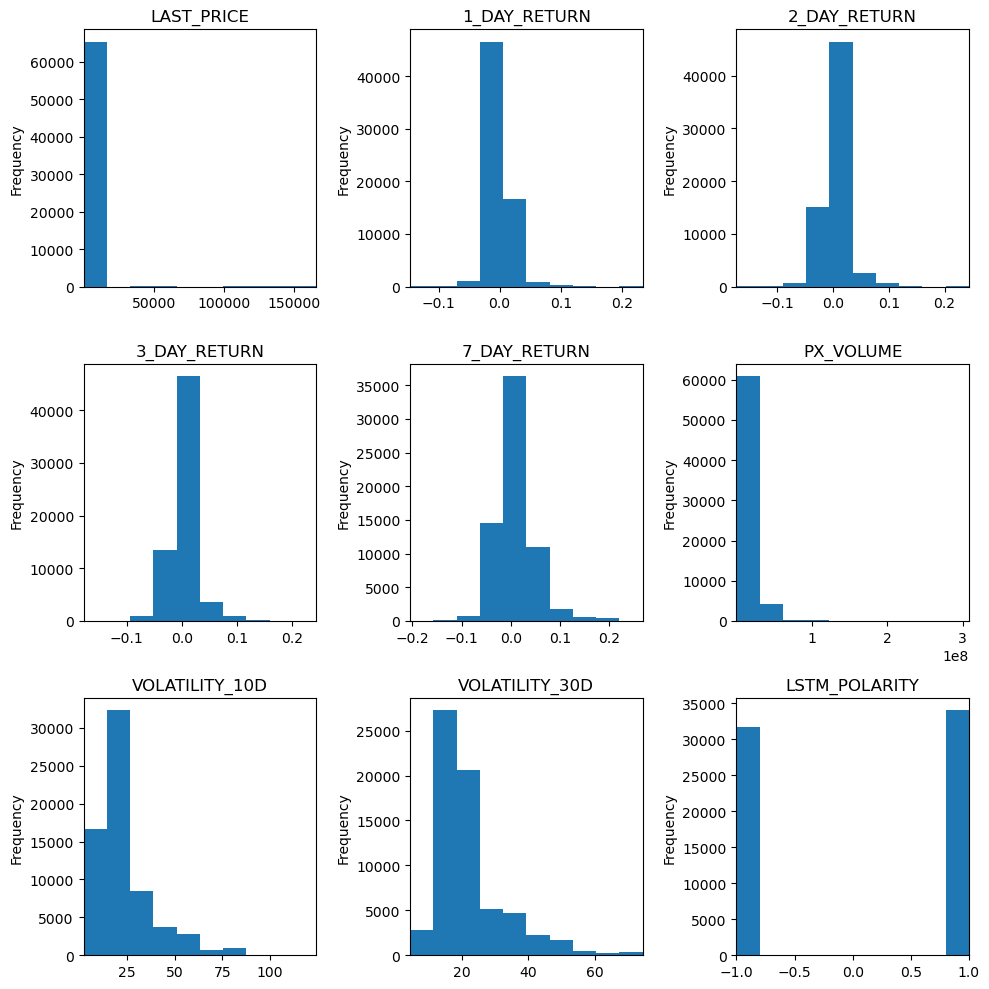

In [ ]:
n_bins = 10
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 10))
axes_flat = axes.flatten()

for i, (col_name, ax) in enumerate(zip(df_col.columns, axes_flat)):
    # calculate bin size based on range of column
    col_range = df_col[col_name].max() - df_col[col_name].min()
    bin_size = col_range / n_bins
    
    # create histogram with dynamic bin size
    df_col[col_name].plot(kind='hist', bins = n_bins, ax=ax)
    
    # set x-axis limit based on range of column
    ax.set_xlim(df_col[col_name].min(), df_col[col_name].max())
    
    ax.set_title(col_name)

plt.tight_layout()
plt.show()

In [ ]:
df_drop_dup.to_csv('cleaned_data.csv')

So far, the columns with numeric values are balanced in terms of the distribution. Hence, there is no outliers or noncorresponding data in the new dataset. We have finished out data cleaning process in this part.

# Topic Modelling for Amazon Stock Tweets

## Dataset import and data transformation




In [23]:
df = pd.read_csv("cleaned_data.csv").drop(columns = 'Unnamed: 0')

In [3]:
#Importing necessary libraries
import pandas as pd


# pre-processing of text
import string
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')
import chardet
import numpy as np

# matplotlib imports are used to plot confusion matrices for the classifiers
import matplotlib as mpl 
import matplotlib.cm as cm 
import matplotlib.pyplot as plt 

# import feature extraction methods from sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import _stop_words
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

# import classifiers from sklearn
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

# import different metrics to evaluate the classifiers
from sklearn.metrics import accuracy_score
from sklearn import metrics

# from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 
from sklearn import metrics

# import time function from time module to track the training duration
from time import time
import nltk

#wrodcloud library
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [4]:
df.head()

,TWEET,STOCK,DATE,LAST_PRICE,1_DAY_RETURN,2_DAY_RETURN,3_DAY_RETURN,7_DAY_RETURN,PX_VOLUME,VOLATILITY_10D,VOLATILITY_30D,LSTM_POLARITY,MENTION
0,RT @robertoglezcano: @amazon #Patents Show Fl...,Amazon,31/01/2017,823.48,0.008379,0.014924,0.014924,-0.001263,3137196.0,13.447,16.992,1.0,@amazon
1,@FAME95FM1 Jamaicans make money with @Payoneer...,PayPal,31/01/2017,39.78,0.002011,0.012318,0.012318,0.054801,9100057.0,18.769,16.099,-1.0,@PayPal
2,@CBSi Jamaicans make money with @Payoneer @Pay...,PayPal,31/01/2017,39.78,0.002011,0.012318,0.012318,0.054801,9100057.0,18.769,16.099,1.0,@PayPal
3,@Hitz92fm Jamaicans make money with @Payoneer ...,PayPal,31/01/2017,39.78,0.002011,0.012318,0.012318,0.054801,9100057.0,18.769,16.099,-1.0,@PayPal
4,RT @loadsofvans: Retweet this post &amp; follo...,Amazon,31/01/2017,823.48,0.008379,0.014924,0.014924,-0.001263,3137196.0,13.447,16.992,-1.0,@amazon


In [8]:
df_filtered = df[df['STOCK'].isin(['Amazon'])]

In [9]:
df_filtered.head()

,TWEET,STOCK,DATE,LAST_PRICE,1_DAY_RETURN,2_DAY_RETURN,3_DAY_RETURN,7_DAY_RETURN,PX_VOLUME,VOLATILITY_10D,VOLATILITY_30D,LSTM_POLARITY,MENTION
0,RT @robertoglezcano: @amazon #Patents Show Fl...,Amazon,31/01/2017,823.48,0.008379,0.014924,0.014924,-0.001263,3137196.0,13.447,16.992,1.0,@amazon
4,RT @loadsofvans: Retweet this post &amp; follo...,Amazon,31/01/2017,823.48,0.008379,0.014924,0.014924,-0.001263,3137196.0,13.447,16.992,-1.0,@amazon
11,RT @jhill1105: @loadsofvans Retweet this post ...,Amazon,31/01/2017,823.48,0.008379,0.014924,0.014924,-0.001263,3137196.0,13.447,16.992,-1.0,@amazon
15,@amazon has your back when it comes to food sh...,Amazon,31/01/2017,823.48,0.008379,0.014924,0.014924,-0.001263,3137196.0,13.447,16.992,-1.0,@amazon
20,Wish List https://t.co/tTBDy3czdm via @amazon,Amazon,31/01/2017,823.48,0.008379,0.014924,0.014924,-0.001263,3137196.0,13.447,16.992,1.0,@amazon


# Text Pre-Processing

We are going to perform below data pre-processing operations on the tweet data stored in OriginalTweet column:

- Remove URLs, hashtags and mentions@
- Remove digits
- Remove the punctuation
- Tokenization
- Remove stop words
- Lemmatize/Stem

In [10]:
#Pre-Processing function to  remove URLs, hashtags, mentions, punctuations, tokenize, remove stopwords and lemmatize.
stopwords = _stop_words.ENGLISH_STOP_WORDS
lemmatizer = WordNetLemmatizer()

def clean(doc): # doc is a string of text
    # Remove URLs
    doc = re.sub(r'http\S+', '', doc)
    # Remove hashtags
    doc = re.sub(r'#\w+', '', doc)
    # Remove mentions
    doc = re.sub(r'@\w+', '', doc)
    # Replace line breaks with spaces
    doc = doc.replace("</br>", " ")
    # Remove punctuation and digits
    doc = "".join([char for char in doc if char not in string.punctuation and not char.isdigit()])
    # Tokenize text
    tokens = word_tokenize(doc)
    # Remove stop words
    tokens = [token for token in tokens if token not in stopwords]
    # Lemmatize tokens
    lemmatized = [lemmatizer.lemmatize(token) for token in tokens]
    # Join lemmatized tokens into a string
    doc = " ".join(lemmatized)
    # Correct spelling
    # blob = TextBlob(doc)
    #doc = str(blob.correct())
    return doc

In [11]:
from gensim.models import LdaModel
from gensim.corpora import Dictionary
from pprint import pprint

### (1) LDA

In [12]:
import gensim
from gensim.utils import simple_preprocess

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

In [14]:
df_filtered['processed_tweet'] = df_filtered['TWEET'].apply(lambda x: clean(x))

<ipython-input-14-87a32312af6d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['processed_tweet'] = df_filtered['TWEET'].apply(lambda x: clean(x))


In [15]:
data = df_filtered['processed_tweet'].values.tolist()

In [16]:
data_words = list(sent_to_words(data))

In [17]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]


lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=5, 
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

In [18]:
for idx in range(5):
    print("Topic #%s:" % idx, lda_model.print_topic(idx, 10))
print("=" * 20)

Topic #0: 0.043*"rt" + 0.025*"the" + 0.017*"new" + 0.012*"book" + 0.010*"love" + 0.009*"in" + 0.009*"home" + 0.008*"delivery" + 0.007*"for" + 0.006*"great"
Topic #1: 0.149*"amazon" + 0.070*"just" + 0.060*"saw" + 0.026*"check" + 0.023*"deal" + 0.012*"rt" + 0.006*"amp" + 0.006*"reeses" + 0.005*"womens" + 0.005*"us"
Topic #2: 0.018*"rt" + 0.008*"your" + 0.008*"piece" + 0.008*"and" + 0.007*"order" + 0.007*"buy" + 0.006*"team" + 0.006*"with" + 0.006*"service" + 0.006*"if"
Topic #3: 0.028*"rt" + 0.025*"the" + 0.011*"mens" + 0.009*"black" + 0.008*"light" + 0.007*"inch" + 0.007*"star" + 0.007*"instant" + 0.007*"yearman" + 0.007*"sandra"
Topic #4: 0.033*"rt" + 0.012*"christmas" + 0.011*"amp" + 0.010*"women" + 0.010*"prime" + 0.010*"time" + 0.010*"product" + 0.009*"day" + 0.009*"free" + 0.008*"available"


Topic #0 could be related to poeple love for new books and their home delivery options since words like "book", "new", and "delivery" are assinged high weights in this class.

Topic #1 could be the about amazon and some deal the comapny made since words like "amazon" and "deal" appear the most frequently in this class.

Topic #2 could be order and buy information.

Topic #3 could be about Mens collection in black color since "mens", and "black" appear in this class.

Topic #4 could be about christmas time particularly prime offers for women collection since words including "christmas", "prime",  and "women" appear in this class.

### (2) Perplexity and coherence scores

In [19]:
lda_model.log_perplexity(corpus)

-9.033165868694178

The perplexity score is -9.033165868694178

In [20]:
from gensim.models import CoherenceModel

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_lda)

Coherence Score:  0.4708753407060217


The coherence score is 0.4708753407060217

### (3) Modify the LDA model by setting the number of topics from two to ten.

In [21]:
# supporting function
def compute_coherence_values(corpus, dictionary, k, a, b):
    
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=k, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=a,
                                           eta=b)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words, dictionary=id2word, coherence='c_v')
    
    return coherence_model_lda.get_coherence()

In [22]:
import numpy as np
import tqdm

grid = {}
grid['Validation_Set'] = {}

# Topics range: Number of Topics (K)
min_topics = 2
max_topics = 11
step_size = 1
topics_range = range(min_topics, max_topics, step_size)

# Alpha parameter: Dirichlet hyperparameter alpha: Document-Topic Density
alpha = [0.01]
'''
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')
'''

# Beta parameter: Dirichlet hyperparameter beta: Word-Topic Density
beta = [0.1]
'''
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')
'''

# Validation sets
num_of_docs = len(corpus)
corpus_sets = [gensim.utils.ClippedCorpus(corpus, int(num_of_docs*0.75)), 
               corpus]

corpus_title = ['75% Corpus', '100% Corpus']

model_results = {'Validation_Set': [],
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }

# Can take a long time to run
if 1 == 1:
    pbar = tqdm.tqdm(total=(len(beta)*len(alpha)*len(topics_range)*len(corpus_title)))
    
    # iterate through validation corpuses
    for i in range(len(corpus_sets)):
        # iterate through number of topics
        for k in topics_range:
            # iterate through alpha values
            for a in alpha:
                # iterare through beta values
                for b in beta:
                    # get the coherence score for the given parameters
                    cv = compute_coherence_values(corpus=corpus_sets[i], dictionary=id2word, 
                                                  k=k, a=a, b=b)
                    # Save the model results
                    model_results['Validation_Set'].append(corpus_title[i])
                    model_results['Topics'].append(k)
                    model_results['Alpha'].append(a)
                    model_results['Beta'].append(b)
                    model_results['Coherence'].append(cv)
                    
                    pbar.update(1)
    pbar.close()

100%|██████████| 18/18 [04:19<00:00, 14.42s/it]


In [24]:
model_results = pd.DataFrame(model_results)
model_results

,Validation_Set,Topics,Alpha,Beta,Coherence
0,75% Corpus,2,0.01,0.1,0.391233
1,75% Corpus,3,0.01,0.1,0.413239
2,75% Corpus,4,0.01,0.1,0.456044
3,75% Corpus,5,0.01,0.1,0.473855
4,75% Corpus,6,0.01,0.1,0.503479
5,75% Corpus,7,0.01,0.1,0.506353
6,75% Corpus,8,0.01,0.1,0.529350
7,75% Corpus,9,0.01,0.1,0.505477
8,75% Corpus,10,0.01,0.1,0.503596
9,100% Corpus,2,0.01,0.1,0.346435


Therefore, we obtain the highest coherence score, 0.517264, when their is a 100% validation set and 9 topics in total.

In [25]:
df1 = model_results[model_results['Validation_Set'] == "100% Corpus"]
x_values = df1['Topics'].values.tolist()
y_values = df1['Coherence'].values.tolist()

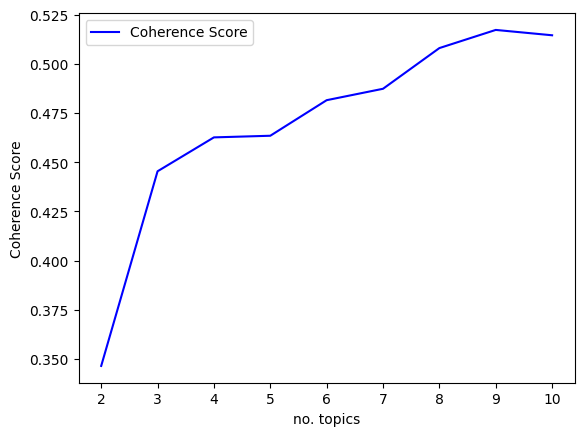

In [26]:
import matplotlib.pyplot as plt

plt.plot(x_values, y_values, 'b', label="Coherence Score")
plt.ylabel('Coherence Score')
plt.xlabel('no. topics')
plt.legend()
plt.show()

 It may make better sense to pick the model that gave the highest CV before flattening out or a major drop. In this case, we picked K=9. Use the optimal value your find in (3) and generate the topics again.

In [27]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]


lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=9, 
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

In [28]:
for idx in range(9):
    print("Topic #%s:" % idx, lda_model.print_topic(idx, 10))
print("=" * 20)

Topic #0: 0.032*"rt" + 0.021*"love" + 0.019*"mens" + 0.015*"new" + 0.015*"the" + 0.014*"for" + 0.012*"need" + 0.011*"releases" + 0.010*"style" + 0.009*"really"
Topic #1: 0.047*"prime" + 0.023*"home" + 0.020*"video" + 0.017*"series" + 0.015*"tv" + 0.014*"funko" + 0.012*"the" + 0.012*"hd" + 0.011*"amp" + 0.011*"coffee"
Topic #2: 0.025*"rt" + 0.024*"gift" + 0.018*"reeses" + 0.016*"piece" + 0.015*"order" + 0.014*"buy" + 0.014*"instant" + 0.012*"now" + 0.012*"with" + 0.012*"way"
Topic #3: 0.023*"us" + 0.020*"black" + 0.017*"led" + 0.013*"white" + 0.013*"rt" + 0.012*"listed" + 0.011*"want" + 0.011*"on" + 0.011*"来自" + 0.010*"color"
Topic #4: 0.034*"rt" + 0.019*"time" + 0.019*"free" + 0.018*"product" + 0.017*"new" + 0.015*"in" + 0.014*"day" + 0.012*"like" + 0.011*"echo" + 0.011*"amp"
Topic #5: 0.205*"amazon" + 0.120*"just" + 0.103*"saw" + 0.011*"womens" + 0.010*"rt" + 0.010*"yoga" + 0.009*"women" + 0.007*"fire" + 0.006*"alexa" + 0.006*"high"
Topic #6: 0.047*"rt" + 0.021*"you" + 0.017*"my" + 0.

# Topic Modelling for Starbucks Stock Tweets

In [29]:
df_filtered = df[df['STOCK'].isin(['Starbucks'])]

In [30]:
df_filtered.head()

,TWEET,STOCK,DATE,LAST_PRICE,1_DAY_RETURN,2_DAY_RETURN,3_DAY_RETURN,7_DAY_RETURN,PX_VOLUME,VOLATILITY_10D,VOLATILITY_30D,LSTM_POLARITY,MENTION
7,"RT @nikitakhara: Thank you, @Starbucks CEO for...",Starbucks,31/01/2017,55.22,0.012314,0.016298,0.016298,0.058312,14307985.0,23.916,17.298,1.0,@Starbucks
14,RT @cultcommoncore: Dumping @Starbucks\r\r\r\r...,Starbucks,31/01/2017,55.22,0.012314,0.016298,0.016298,0.058312,14307985.0,23.916,17.298,-1.0,@Starbucks
19,"RT @nia4_trump: So instead of hiring 10,000 un...",Starbucks,31/01/2017,55.22,0.012314,0.016298,0.016298,0.058312,14307985.0,23.916,17.298,-1.0,@Starbucks
24,RT @RealGreek4Trump: #BoycottStarbucks @Starbu...,Starbucks,31/01/2017,55.22,0.012314,0.016298,0.016298,0.058312,14307985.0,23.916,17.298,1.0,@Starbucks
33,RT @Starbucksnews: Message from Howard Schultz...,Starbucks,31/01/2017,55.22,0.012314,0.016298,0.016298,0.058312,14307985.0,23.916,17.298,1.0,@Starbucks


### (1) LDA

In [31]:
df_filtered['processed_tweet'] = df_filtered['TWEET'].apply(lambda x: clean(x))

<ipython-input-31-87a32312af6d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['processed_tweet'] = df_filtered['TWEET'].apply(lambda x: clean(x))


In [32]:
data = df_filtered['processed_tweet'].values.tolist()

In [33]:
data_words = list(sent_to_words(data))

In [34]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]


lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=5, 
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

In [35]:
for idx in range(5):
    print("Topic #%s:" % idx, lda_model.print_topic(idx, 10))
print("=" * 20)

Topic #0: 0.028*"rt" + 0.017*"it" + 0.016*"cause" + 0.014*"free" + 0.012*"drink" + 0.012*"dude" + 0.011*"hello" + 0.010*"barista" + 0.008*"just" + 0.008*"need"
Topic #1: 0.020*"district" + 0.019*"want" + 0.018*"charging" + 0.017*"hey" + 0.016*"rt" + 0.015*"coffee" + 0.014*"if" + 0.014*"amp" + 0.012*"city" + 0.012*"love"
Topic #2: 0.106*"starbucks" + 0.059*"rt" + 0.030*"coffee" + 0.024*"hyungwon" + 0.021*"king" + 0.017*"card" + 0.015*"the" + 0.015*"youre" + 0.014*"amp" + 0.010*"there"
Topic #3: 0.049*"starbucks" + 0.024*"rt" + 0.021*"when" + 0.018*"love" + 0.017*"cup" + 0.016*"great" + 0.016*"im" + 0.015*"special" + 0.014*"order" + 0.013*"kind"
Topic #4: 0.039*"starbucks" + 0.037*"just" + 0.030*"rt" + 0.018*"coffee" + 0.015*"guy" + 0.015*"know" + 0.012*"read" + 0.012*"said" + 0.011*"dr" + 0.011*"trash"


Topic #0 could be related to free drinks since words like "free", "drink" are assinged high weights in this class.

Topic #1 could be the about districts and charging since words like "dsitricts" and "charging" appear the most frequently in this class.

Topic #2 could be about Hyungwon singer and people's liking for him since words like "Hyungwon" and "King" are given high weights in this class.

Topic #3 could be about love for special orders at starbucks since "love", "special", and "order" appear in this class.

Topic #4 could be about the some people's negative review for coffee since words including "said", "coffee",  and "trash" appear in this class.

### (2) Perplexity and coherence scores

In [36]:
lda_model.log_perplexity(corpus)

-7.929060523208581

The perplexity score is -7.929060523208581

In [37]:
from gensim.models import CoherenceModel

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_lda)

Coherence Score:  0.4559469055988801


The coherence score is 0.4559469055988801

### (3) Modify the LDA model by setting the number of topics from two to ten.

In [38]:
# supporting function
def compute_coherence_values(corpus, dictionary, k, a, b):
    
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=k, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=a,
                                           eta=b)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words, dictionary=id2word, coherence='c_v')
    
    return coherence_model_lda.get_coherence()

In [39]:
import numpy as np
import tqdm

grid = {}
grid['Validation_Set'] = {}

# Topics range: Number of Topics (K)
min_topics = 2
max_topics = 11
step_size = 1
topics_range = range(min_topics, max_topics, step_size)

# Alpha parameter: Dirichlet hyperparameter alpha: Document-Topic Density
alpha = [0.01]
'''
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')
'''

# Beta parameter: Dirichlet hyperparameter beta: Word-Topic Density
beta = [0.1]
'''
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')
'''

# Validation sets
num_of_docs = len(corpus)
corpus_sets = [gensim.utils.ClippedCorpus(corpus, int(num_of_docs*0.75)), 
               corpus]

corpus_title = ['75% Corpus', '100% Corpus']

model_results = {'Validation_Set': [],
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }

# Can take a long time to run
if 1 == 1:
    pbar = tqdm.tqdm(total=(len(beta)*len(alpha)*len(topics_range)*len(corpus_title)))
    
    # iterate through validation corpuses
    for i in range(len(corpus_sets)):
        # iterate through number of topics
        for k in topics_range:
            # iterate through alpha values
            for a in alpha:
                # iterare through beta values
                for b in beta:
                    # get the coherence score for the given parameters
                    cv = compute_coherence_values(corpus=corpus_sets[i], dictionary=id2word, 
                                                  k=k, a=a, b=b)
                    # Save the model results
                    model_results['Validation_Set'].append(corpus_title[i])
                    model_results['Topics'].append(k)
                    model_results['Alpha'].append(a)
                    model_results['Beta'].append(b)
                    model_results['Coherence'].append(cv)
                    
                    pbar.update(1)
    pbar.close()

100%|██████████| 18/18 [01:31<00:00,  5.07s/it]


In [40]:
model_results = pd.DataFrame(model_results)
model_results

,Validation_Set,Topics,Alpha,Beta,Coherence
0,75% Corpus,2,0.01,0.1,0.298630
1,75% Corpus,3,0.01,0.1,0.374586
2,75% Corpus,4,0.01,0.1,0.427606
3,75% Corpus,5,0.01,0.1,0.411800
4,75% Corpus,6,0.01,0.1,0.429071
5,75% Corpus,7,0.01,0.1,0.479452
6,75% Corpus,8,0.01,0.1,0.485974
7,75% Corpus,9,0.01,0.1,0.461499
8,75% Corpus,10,0.01,0.1,0.499762
9,100% Corpus,2,0.01,0.1,0.358664


Therefore, we obtain the highest coherence score, 0.473670, when their is a 100% validation set and 9 topics in total.

In [41]:
df1 = model_results[model_results['Validation_Set'] == "100% Corpus"]
x_values = df1['Topics'].values.tolist()
y_values = df1['Coherence'].values.tolist()

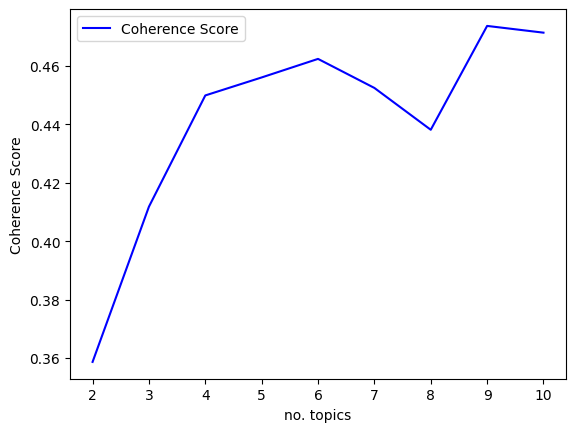

In [42]:
import matplotlib.pyplot as plt

plt.plot(x_values, y_values, 'b', label="Coherence Score")
plt.ylabel('Coherence Score')
plt.xlabel('no. topics')
plt.legend()
plt.show()

 It may make better sense to pick the model that gave the highest CV before flattening out or a major drop. In this case, we picked K=9. Use the optimal value your find in (3) and generate the topics again.

In [43]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]


lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=9, 
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

In [44]:
for idx in range(9):
    print("Topic #%s:" % idx, lda_model.print_topic(idx, 10))
print("=" * 20)

Topic #0: 0.048*"im" + 0.028*"city" + 0.028*"seattle" + 0.027*"rt" + 0.026*"brand" + 0.022*"al" + 0.022*"hello" + 0.021*"riyadh" + 0.018*"kuwait" + 0.017*"we"
Topic #1: 0.039*"rt" + 0.026*"know" + 0.022*"life" + 0.022*"you" + 0.021*"idea" + 0.019*"trash" + 0.018*"block" + 0.018*"kait" + 0.016*"drink" + 0.016*"good"
Topic #2: 0.104*"starbucks" + 0.104*"rt" + 0.030*"hyungwon" + 0.026*"youre" + 0.026*"king" + 0.015*"shop" + 0.015*"coffee" + 0.015*"sign" + 0.015*"open" + 0.013*"store"
Topic #3: 0.037*"starbucks" + 0.034*"like" + 0.032*"im" + 0.031*"say" + 0.028*"regular" + 0.025*"kind" + 0.024*"master" + 0.023*"latte" + 0.019*"pumpkin" + 0.015*"spice"
Topic #4: 0.092*"starbucks" + 0.048*"coffee" + 0.035*"rt" + 0.032*"just" + 0.027*"card" + 0.019*"when" + 0.017*"buy" + 0.016*"got" + 0.016*"day" + 0.016*"guy"
Topic #5: 0.043*"love" + 0.043*"hey" + 0.040*"want" + 0.032*"if" + 0.027*"amp" + 0.027*"food" + 0.027*"know" + 0.026*"donate" + 0.025*"us" + 0.023*"decision"
Topic #6: 0.038*"district" 

topic 3 in method LDA is similar to cluster 1 in text clustering results in IC5, they both related to chicken restaurants. topic 5 in method LDA is similar to cluster 3 4 5 in text clustering results in IC5, they are all related to restaurants reviews about good foods and services. Other than that, the other results are different. topic in LDA has some content about cake stores, barber stores and car rental companies. The clusters in text clustering results are more about restaurant reviews.

# Topic Modelling for Nike Stock Tweets

In [45]:
df_filtered = df[df['STOCK'].isin(['Nike'])]

In [46]:
df_filtered.head()

,TWEET,STOCK,DATE,LAST_PRICE,1_DAY_RETURN,2_DAY_RETURN,3_DAY_RETURN,7_DAY_RETURN,PX_VOLUME,VOLATILITY_10D,VOLATILITY_30D,LSTM_POLARITY,MENTION
125,RT @Nike: Greatest ever. @serenawilliams #just...,Nike,31/01/2017,52.9,0.003403,0.005482,0.005482,0.010397,12342873.0,8.853,15.503,1.0,@Nike
228,Shoe Dog: A Memoir by the Creator of @Nike htt...,Nike,31/01/2017,52.9,0.003403,0.005482,0.005482,0.010397,12342873.0,8.853,15.503,-1.0,@Nike
273,@colettey6 @Nike I don't do any of those thing...,Nike,31/01/2017,52.9,0.003403,0.005482,0.005482,0.010397,12342873.0,8.853,15.503,-1.0,@Nike
307,The unisex @Nike Sock Dart knocks your socks o...,Nike,31/01/2017,52.9,0.003403,0.005482,0.005482,0.010397,12342873.0,8.853,15.503,-1.0,@Nike
387,Nice sentiment from @Nike. They retain my cust...,Nike,31/01/2017,52.9,0.003403,0.005482,0.005482,0.010397,12342873.0,8.853,15.503,1.0,@Nike


### (1) LDA

In [47]:
df_filtered['processed_tweet'] = df_filtered['TWEET'].apply(lambda x: clean(x))

<ipython-input-47-87a32312af6d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['processed_tweet'] = df_filtered['TWEET'].apply(lambda x: clean(x))


In [48]:
data = df_filtered['processed_tweet'].values.tolist()

In [49]:
data_words = list(sent_to_words(data))

In [50]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]


lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=5, 
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

In [51]:
for idx in range(5):
    print("Topic #%s:" % idx, lda_model.print_topic(idx, 10))
print("=" * 20)

Topic #0: 0.125*"nike" + 0.035*"rt" + 0.025*"size" + 0.022*"just" + 0.020*"buy" + 0.016*"air" + 0.010*"boycott" + 0.010*"did" + 0.010*"nfl" + 0.009*"mens"
Topic #1: 0.022*"like" + 0.019*"rt" + 0.014*"really" + 0.014*"what" + 0.013*"good" + 0.012*"im" + 0.011*"look" + 0.011*"share" + 0.011*"police" + 0.011*"lol"
Topic #2: 0.051*"nike" + 0.046*"rt" + 0.023*"just" + 0.021*"ad" + 0.018*"campaign" + 0.017*"money" + 0.015*"the" + 0.014*"wearing" + 0.013*"kaepernick" + 0.013*"new"
Topic #3: 0.058*"nike" + 0.037*"rt" + 0.018*"colin" + 0.014*"white" + 0.014*"support" + 0.014*"kaepernick" + 0.014*"sock" + 0.013*"black" + 0.013*"product" + 0.011*"going"
Topic #4: 0.089*"nike" + 0.055*"check" + 0.046*"rt" + 0.012*"you" + 0.011*"just" + 0.010*"this" + 0.009*"believe" + 0.009*"xl" + 0.009*"running" + 0.008*"think"


Topic #0 could be related to boycott of Nike shoes at NFL since words like "boycott", "nfl", and "Nike" are assinged high weights in this class.

Topic #1 could be the about how people feel wearing Nike products.

Topic #2 could be about Nike's ad campaigns and money being spent/made out of it since words such as "ad", "campaign", and "money" appear in this class.

Topic #3 could be about a specific product since "white", "product", and "kaepernick" appear in this class.

Topic #4 could be about sizing issues for Nike products numbers since words including "check", "xl",  and "believe" appear in this class.

### (2) Perplexity and coherence scores

In [52]:
lda_model.log_perplexity(corpus)

-8.189940116567602

The perplexity score is -8.189940116567602

In [53]:
from gensim.models import CoherenceModel

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_lda)

Coherence Score:  0.28729302415415764


The coherence score is 0.28729302415415764

### (3) Modify the LDA model by setting the number of topics from two to ten.

In [54]:
# supporting function
def compute_coherence_values(corpus, dictionary, k, a, b):
    
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=k, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=a,
                                           eta=b)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words, dictionary=id2word, coherence='c_v')
    
    return coherence_model_lda.get_coherence()

In [55]:
import numpy as np
import tqdm

grid = {}
grid['Validation_Set'] = {}

# Topics range: Number of Topics (K)
min_topics = 2
max_topics = 11
step_size = 1
topics_range = range(min_topics, max_topics, step_size)

# Alpha parameter: Dirichlet hyperparameter alpha: Document-Topic Density
alpha = [0.01]
'''
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')
'''

# Beta parameter: Dirichlet hyperparameter beta: Word-Topic Density
beta = [0.1]
'''
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')
'''

# Validation sets
num_of_docs = len(corpus)
corpus_sets = [gensim.utils.ClippedCorpus(corpus, int(num_of_docs*0.75)), 
               corpus]

corpus_title = ['75% Corpus', '100% Corpus']

model_results = {'Validation_Set': [],
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }

# Can take a long time to run
if 1 == 1:
    pbar = tqdm.tqdm(total=(len(beta)*len(alpha)*len(topics_range)*len(corpus_title)))
    
    # iterate through validation corpuses
    for i in range(len(corpus_sets)):
        # iterate through number of topics
        for k in topics_range:
            # iterate through alpha values
            for a in alpha:
                # iterare through beta values
                for b in beta:
                    # get the coherence score for the given parameters
                    cv = compute_coherence_values(corpus=corpus_sets[i], dictionary=id2word, 
                                                  k=k, a=a, b=b)
                    # Save the model results
                    model_results['Validation_Set'].append(corpus_title[i])
                    model_results['Topics'].append(k)
                    model_results['Alpha'].append(a)
                    model_results['Beta'].append(b)
                    model_results['Coherence'].append(cv)
                    
                    pbar.update(1)
    pbar.close()

100%|██████████| 18/18 [07:22<00:00, 24.56s/it]


In [56]:
model_results = pd.DataFrame(model_results)
model_results

,Validation_Set,Topics,Alpha,Beta,Coherence
0,75% Corpus,2,0.01,0.1,0.264487
1,75% Corpus,3,0.01,0.1,0.311074
2,75% Corpus,4,0.01,0.1,0.293550
3,75% Corpus,5,0.01,0.1,0.300187
4,75% Corpus,6,0.01,0.1,0.330729
5,75% Corpus,7,0.01,0.1,0.381511
6,75% Corpus,8,0.01,0.1,0.395900
7,75% Corpus,9,0.01,0.1,0.387102
8,75% Corpus,10,0.01,0.1,0.378439
9,100% Corpus,2,0.01,0.1,0.304231


Therefore, we obtain the highest coherence score, 0.383000, when their is a 100% validation set and 9 topics in total.

In [57]:
df1 = model_results[model_results['Validation_Set'] == "100% Corpus"]
x_values = df1['Topics'].values.tolist()
y_values = df1['Coherence'].values.tolist()

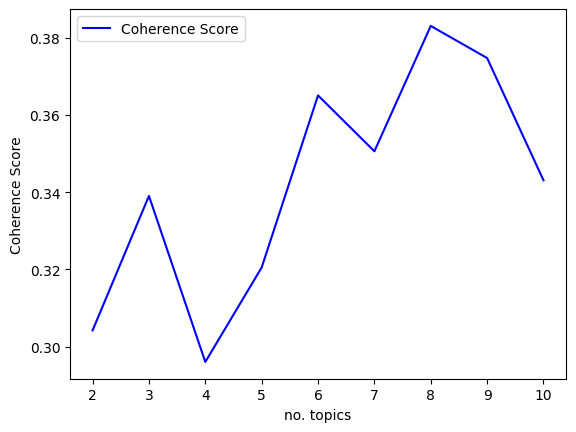

In [58]:
import matplotlib.pyplot as plt

plt.plot(x_values, y_values, 'b', label="Coherence Score")
plt.ylabel('Coherence Score')
plt.xlabel('no. topics')
plt.legend()
plt.show()

 It may make better sense to pick the model that gave the highest CV before flattening out or a major drop. In this case, we picked K=8. Use the optimal value your find in (3) and generate the topics again.

In [59]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]


lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=8, 
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

In [61]:
for idx in range(8):
    print("Topic #%s:" % idx, lda_model.print_topic(idx, 10))
print("=" * 20)

Topic #0: 0.142*"nike" + 0.054*"rt" + 0.030*"size" + 0.024*"new" + 0.022*"kaepernick" + 0.019*"buy" + 0.016*"shoe" + 0.016*"ad" + 0.016*"nfl" + 0.015*"colin"
Topic #1: 0.036*"if" + 0.036*"like" + 0.028*"so" + 0.027*"what" + 0.023*"say" + 0.019*"rt" + 0.018*"trump" + 0.016*"used" + 0.016*"idiot" + 0.015*"ask"
Topic #2: 0.075*"just" + 0.044*"nike" + 0.041*"rt" + 0.032*"people" + 0.025*"did" + 0.022*"wearing" + 0.016*"that" + 0.014*"how" + 0.014*"police" + 0.013*"doing"
Topic #3: 0.099*"nike" + 0.046*"rt" + 0.026*"boycott" + 0.024*"product" + 0.023*"and" + 0.021*"good" + 0.020*"my" + 0.018*"mean" + 0.018*"year" + 0.016*"crazy"
Topic #4: 0.070*"nike" + 0.029*"want" + 0.028*"support" + 0.027*"dont" + 0.026*"company" + 0.026*"rt" + 0.018*"burn" + 0.017*"no" + 0.014*"they" + 0.012*"basketball"
Topic #5: 0.032*"rt" + 0.030*"you" + 0.025*"think" + 0.024*"stock" + 0.022*"going" + 0.021*"right" + 0.018*"this" + 0.017*"blue" + 0.016*"thing" + 0.016*"for"
Topic #6: 0.092*"nike" + 0.074*"check" + 0.